In [1]:
import sys
import os

# Add the project root directory to sys.path
project_root = os.path.abspath(".") 
if project_root not in sys.path:
    sys.path.append(project_root)
print(sys.path[-1])


from reward_func.evo_devo import coord_reward_func, oscillator_reward_func, somitogenesis_reward_func


/Users/dannyhuang/Developer/gflownet2/base


# test reward function 

In [2]:
import time

test_state = (50, -53, -57, 8, 9, -6, -117, 81, 8)

start_time = time.perf_counter_ns()
test_reward = coord_reward_func(test_state)
end_time = time.perf_counter_ns()
print(f"Time taken to run coord_reward_func: {(end_time - start_time)/1e9:.9f} seconds")

print(f"Test reward for state {test_state}: {test_reward}")
    



Time taken to run coord_reward_func: 0.000025292 seconds
Test reward for state (50, -53, -57, 8, 9, -6, -117, 81, 8): 4


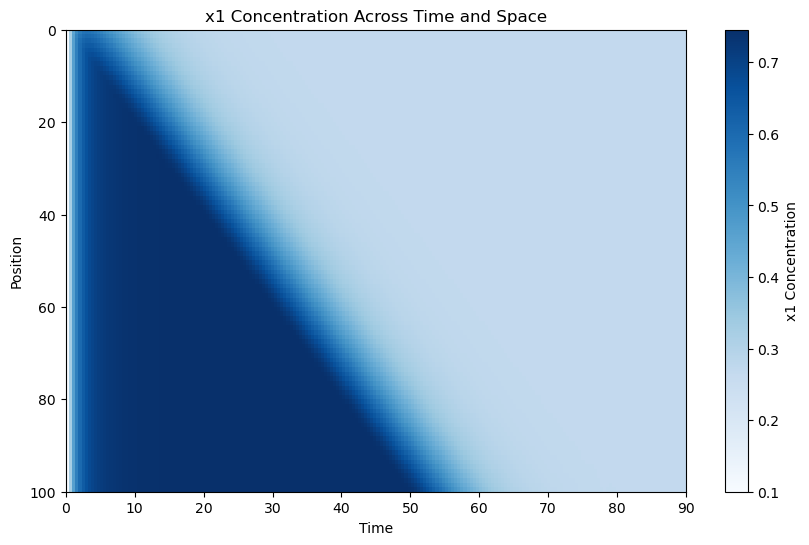

Total boundaries across 3 timepoints: 0
Reward for somitogenesis: 0.0


In [11]:
# test_weights = [-60, -150, 0, -109, 65, -66, -145, -41, 58] # -41(41), 58 
# test_weights = [44, -24, -26, 23, 55, 25, -51, 1, -3] 
# test_weights = [154, -200, 82, -33, 90, -90, -82, -13, 30] 

# test_weights = (25, -200, 55, -81, 181, -176, -176, -41, 80) 
# test_weights = (61, -105, 35, -35, 10, -30, -176, 11, 132) 
# test_weights = (126, -177, 82, -55, 136, -130, -181, 6, 26)
# test_weights =(77, 135, -100, 55, 200, -200, 200, 77, 55) 

reward = somitogenesis_reward_func(test_weights, plot=True)
print(f"Reward for somitogenesis: {reward}")


In [12]:
# # test_weights = [-5, 2, 3, 1, 2, -1, 2, 1, -3] 
# # test_weights = [0, -10, 0, 4, 6, -10, -10, 0, 0]  # w12=-5, w22=..., w23=-10, w31=-10 
# test_weights = [154, -200, 82, -33, 90, -90, -82, -13, 30] 
# reward = oscillator_reward_func(test_weights, plot=True)
# print(f"Reward for oscillator: {reward}")

# testing

In [ ]:

"""Test case: Mixed positive/negative actions"""

args_mixed = argparse.Namespace(
    min_reward=0.001,
    custom_reward_fn=coord_reward_func,
    n_steps=5,
    n_dims=2,
    actions_per_dim=[1, -1, 2, -2],  # Mixed positive and negative actions
    grid_bound=5,
    enable_time=True
)
env_mixed = GridEnv(args_mixed)
env_mixed.print_actions()
env_mixed.reset()

mixed_test_state = (17, [-5, -5])
print("forward: ", env_mixed.get_forward_mask(mixed_test_state))
print("backward: ", env_mixed.get_backward_mask(mixed_test_state))
print("step: ", env_mixed._step)
print()  # Add blank line between iterations



In [ ]:
import time

# Function that simulates an expensive computation
def expensive_computation(x):
    time.sleep(0.1)  # Simulate work
    return x * 2

# Test without cache
print("Without cache:")
start_time = time.time()
for i in range(10):
    # Compute same values multiple times
    result = expensive_computation(i % 3)  # Only compute 0,1,2 repeatedly
    print(f"Computing {i % 3} -> {result}")
no_cache_time = time.time() - start_time
print(f"Time without cache: {no_cache_time:.2f}s\n")

# Test with cache
print("With cache:")
cache = LRUCache(max_size=3)
start_time = time.time()
for i in range(10):
    key = i % 3
    if key in cache:
        result = cache[key]
        print(f"Cache hit for {key} -> {result}")
    else:
        result = expensive_computation(key)
        cache[key] = result
        print(f"Cache miss for {key} -> {result}")
cache_time = time.time() - start_time
print(f"Time with cache: {cache_time:.2f}s")

print(f"\nCache speedup: {no_cache_time/cache_time:.1f}x faster")
